# Spectograms
The studied samples do not rely with a piano, a flute, a violin or a trumpet.

### 2.9 Propose an explanation for why the previous samples do not sound natural

It is just a period of a note, so we can not determine its frequency because of its aperiodicity.

### 2.10 Load, find frequency and play the sound
The files `PianoLa.wav` (Note that this one is `.wav`, it is not a typo), `TrumpetLa.aif`, `ViolinLa.aif` and `FluteLa.aif` correspond to the full recording of the sounds from which the previous period samples have been taken.

In [2]:
# Import necessary libraries
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd

# List of necessary files to load
files = ['./TDSound/PianoLa.wav',
         './TDSound/FluteLa.aif',
         './TDSound/ViolinLa.aif',
         './TDSound/TrumpetLa.aif']

# Store sampling frequency as a float
# and amplitudes as an array of each file in:
frequencies = [0] * len(files)
amplitudes = [0] * len(files)

# For each file, store the sampling frequency and the amplitudes
for i in range(len(files)):
    amplitudes[i], frequencies[i] = sf.read(files[i], dtype='float32')   # It loads files and extracts info

# There are 2 channels of sound, we separate them
ch1_amplitudes = [0] * len(files)
ch2_amplitudes = [0] * len(files)
for i in range(len(files)):
    ch1_amplitudes[i] = [amplitudes[i][j][0] for j in range(len(amplitudes[i]))]
    ch2_amplitudes[i] = [amplitudes[i][j][1] for j in range(len(amplitudes[i]))]

# Plot the amplitudes of each file, for ensuring everything is ok
instruments = []    # List of instruments
for i in range(len(files)):
    file = files[i]
    instruments.append(file[10:-4])
    print('Sampling frequency of', instruments[i], 'file:', frequencies[i])

Sampling frequency of PianoLa file: 44100
Sampling frequency of FluteLa file: 44100
Sampling frequency of ViolinLa file: 44100
Sampling frequency of TrumpetLa file: 44100


For simplicity as there are two channels, we will work just with one of them.

In [3]:
for i in range(len(ch1_amplitudes)):
    playing = np.asarray(ch1_amplitudes[i], dtype='float32')
    sd.play(playing, frequencies[i])
    status = sd.wait()

#### Is the sound closer to what you expect?

Yes, it is much clearer to distinguish between instruments.

### 2.11 Plot the audio
Note that each array contains two column corresponding to the left and right channel (stereo recording); for simplicity’s sake, we will only study one of them.

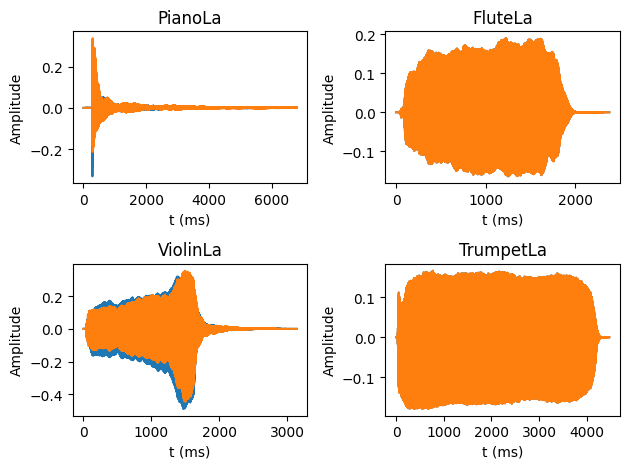

In [5]:
spacing = []
for i in range(len(instruments)):
    spacing.append(1 / frequencies[i])

# Time interval between two values of the sound signal
times = []
for j in range(len(instruments)):
    amplitude = amplitudes[j]
    times.append([i * spacing[j] for i in range(len(amplitude))]) # in seconds

# Subplots of the signals
plt.figure(1)
for i in range(len(instruments)):
    plt.subplot(2, 2, i + 1)
    time = times[i]
    plt.plot([j * 10 ** 3 for j in time], amplitudes[i]) # time in miliseconds
    plt.title(instruments[i])
    plt.ylabel('Amplitude')
    plt.xlabel('t (ms)')
plt.tight_layout()
plt.show()

#### Using the zoom feature interpret the shape of the sound signals.
It depends on the mechanism used, it is easy to distinguish percussion, wind and wire.

#### Show that we can split the evolution of the signal in different phases, and link them to your sensation while listening to the sound.
Initial, middle and final phases.

#### Compare the period of the sound for these different phases.
Piano is the shortest, followed by the violin, and finally the wind instruments lead by the trumpet.

## 2.12 Calculate Fourier transform
Create the frequency axis. Plot the Fourier spectrum. Note that this signal is not periodic, and this calculation is indeed a **Fourier transform** and _*no longer a Fourier series*_ development.

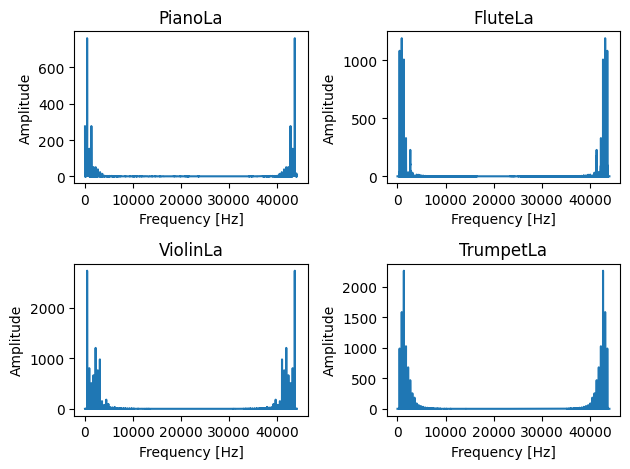

In [8]:
coeffs = []
for i in range(len(instruments)):
    coeffs.append(np.fft.fft(ch1_amplitudes[i]).tolist())  # convert numpy array to list

# Subplots for the absolute value of Fourier coefficients
fourier_freqs = []
plt.figure(2)
for i in range(len(instruments)):
    # Build axis
    time = times[i]
    period = time[-1]   # Signal period, as we know that the signal is 1 period
    signal_freq = 1. / period  # Signal frequency
    fourier_freq = [j * signal_freq for j in range(len(coeffs[i]))]  # Frequency in Fourier space
    fourier_freqs.append(fourier_freq)
    # Plot Fourier spectrum
    plt.subplot(2, 2, i + 1)
    plt.plot(fourier_freq, np.abs(coeffs[i]))
    plt.title(instruments[i])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

### 2.13 Discussion

To think

### 2.14 Propose an order

In [9]:
Thum = 0.1
Nw = 2 ** np.ceil(np.log2(Thum * frequencies[0]))  # Numbers in the window, 8192
s = 4.

N = []
Ns = []
for i in range(len(instruments)):
    N.append(len(amplitudes[i]))
    Ns.append(np.floor((N[i]-Nw)/(Nw/s)))  # 142 for piano
print(Ns,Nw)

matrices = []
for i in range(len(instruments)):
    matrices.append(np.zeros((int(Nw), int(Ns[i]))))

[142.0, 47.0, 63.0, 92.0] 8192.0
